In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)

In [7]:
# NAMES
names = np.random.choice(['John', 'Emily', 'Daniel', 'Emma', 'Michael'], size=300)
last_names = np.random.choice(['Smith', 'Johnson', 'Lee', 'Wilson', 'Brown'], size=300)
full_names = [f'{first} {last}' for first, last in zip(names, last_names)]

In [8]:
# UNIVERSITIES
universities = np.random.choice(['University A', 'University B', 'University C'], size=300)

In [9]:
# GPA
cgpa = np.random.uniform(2.0, 4.0, size=300)

In [10]:
# GENDERS
genders = np.random.choice(['Male', 'Female'], size=300)

In [11]:
# ACADEMIC YEARS
years = np.random.randint(2018, 2023, size=300)

In [12]:
# UNI TYPE
university_types = np.random.choice(['Public', 'Private'], size=300)

In [13]:
#UNI DEPARTEMENTS
departments = np.random.choice(['Physics', 'Chemistry', 'Biology'], size=300)

In [14]:
#FAMILY INCOMES
family_income = np.random.randint(30000, 90001, size=300)

In [15]:
# EXTRACURRICULAR
extracurricular = np.random.choice(['Yes', 'No'], size=300)

In [16]:
#MAKING FILE
data = pd.DataFrame({
    'name': full_names,
    'university': universities,
    'cgpa': cgpa,
    'gender': genders,
    'year': years,
    'university_type': university_types,
    'department': departments,
    'family_income': family_income,
    'extracurricular': extracurricular
})

In [17]:
# Specify the file path and name for the CSV file
csv_file_path = 'student_data.csv'

In [18]:
# Export the DataFrame to CSV
data.to_csv(csv_file_path, index=False)

In [19]:
df = pd.read_csv("student_data.csv")

In [20]:
df

,name,university,cgpa,gender,year,university_type,department,family_income,extracurricular
0,Emma Brown,University C,2.730714,Female,2022,Private,Chemistry,82188,Yes
1,Michael Brown,University A,2.975620,Male,2019,Public,Physics,85099,Yes
2,Daniel Smith,University C,3.701635,Male,2020,Private,Physics,65262,Yes
3,Michael Brown,University C,2.175775,Male,2018,Private,Chemistry,42677,No
4,Michael Lee,University A,3.611730,Female,2020,Public,Physics,81871,Yes
...,...,...,...,...,...,...,...,...,...
295,Michael Brown,University A,2.180674,Male,2021,Public,Physics,53387,Yes
296,Michael Brown,University A,3.541972,Male,2021,Private,Physics,58444,Yes
297,Daniel Brown,University B,2.136499,Male,2019,Private,Biology,78908,No
298,Emma Brown,University A,3.674158,Female,2018,Private,Chemistry,49921,Yes


In [21]:
df.shape

(300, 9)

In [22]:
df.describe()

,cgpa,year,family_income
count,300.000000,300.000000,300.000000
mean,3.046851,2020.046667,62391.706667
std,0.553703,1.391982,16669.541224
min,2.005422,2018.000000,30163.000000
25%,2.614703,2019.000000,50572.000000
50%,3.070106,2020.000000,61212.000000
75%,3.531924,2021.000000,76852.500000
max,3.995385,2022.000000,89945.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             300 non-null    object 
 1   university       300 non-null    object 
 2   cgpa             300 non-null    float64
 3   gender           300 non-null    object 
 4   year             300 non-null    int64  
 5   university_type  300 non-null    object 
 6   department       300 non-null    object 
 7   family_income    300 non-null    int64  
 8   extracurricular  300 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 21.2+ KB


In [25]:
df.isnull().sum()

name               0
university         0
cgpa               0
gender             0
year               0
university_type    0
department         0
family_income      0
extracurricular    0
dtype: int64

In [27]:
df.duplicated().sum()

0

# Task :01
Here are 30 data science questions that you can explore using your dataset of 300 students with columns for name, university, and CGPA:

### What are the top 5 universities with the highest average CGPA?

In [42]:
cgpa_average=df.groupby("university")["cgpa"].mean() # getting mean of cgpa in terms of university
top_5=cgpa_average.sort_values(ascending=False)   # sorting values in descending order 
top = top_5.head(5)   
print(top)


university
University A    3.120098
University B    3.021482
University C    2.990915
Name: cgpa, dtype: float64


### Is there a correlation between the CGPA and the length of the student's name?

In [47]:
# first find the length of name 
df["name_length"]= df["name"].apply(len)


In [53]:
# then create corelation between cgpa and name length
corealtion = np.corrcoef(df["cgpa"],df["name_length"])[0,1]
print("Corelation Between CGPA and Length of Student Name:",corealtion)

Corelation Between CGPA and Length of Student Name: -0.023075514159624794


### How does the CGPA vary across different universities?

In [55]:
cgpa_stats= df.groupby("university")["cgpa"].describe()
cgpa_stats

,count,mean,std,min,25%,50%,75%,max
university,,,,,,,,
University A,106.0,3.120098,0.541966,2.036485,2.728752,3.164554,3.584799,3.981859
University B,101.0,3.021482,0.580041,2.010600,2.454791,3.070073,3.535559,3.950134
University C,93.0,2.990915,0.534249,2.005422,2.555174,2.981498,3.452191,3.995385


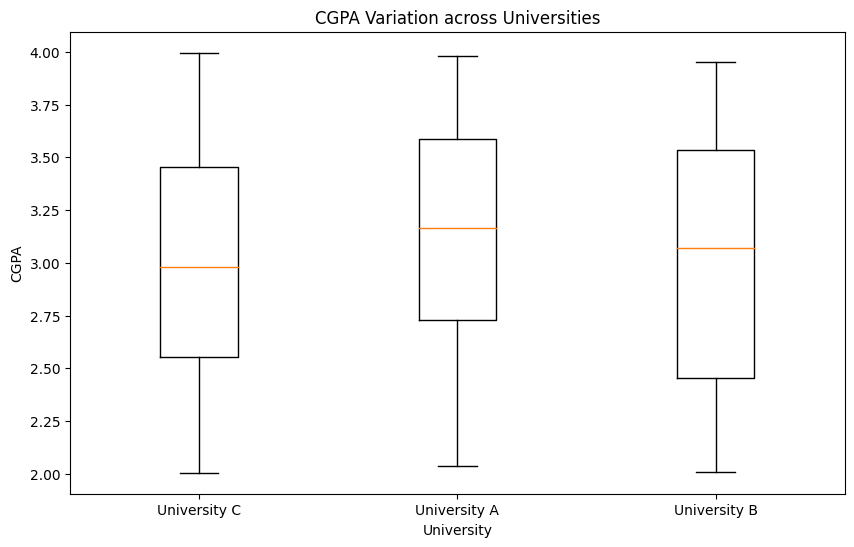

In [56]:
# Plot a boxplot to visualize the CGPA distribution across universities
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['university'] == uni]['cgpa'] for uni in df['university'].unique()], labels=df['university'].unique())
plt.xlabel('University')
plt.ylabel('CGPA')
plt.title('CGPA Variation across Universities')
plt.show()

### Can we predict a student's CGPA based on the length of their name using linear regression?

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [58]:
# Define the features (independent variable) and target (dependent variable)
X = df['name_length'].values.reshape(-1, 1)
y = df['cgpa'].values

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predict CGPA for the test set
y_pred = model.predict(X_test)

In [62]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.3291595832912133


### Which university has the highest number of students with a CGPA above a certain threshold?

In [63]:
# Specify the CGPA threshold
cgpa_threshold = 3.5

In [64]:
# Filter the DataFrame to include only students above the CGPA threshold
filtered_df = df[df['cgpa'] > cgpa_threshold]

In [65]:
# Group the filtered DataFrame by university and count the number of students
university_counts = filtered_df['university'].value_counts()


In [71]:
# Get the university with the highest number of students above the threshold
university_with_highest_count = university_counts.idxmax()
highest_count = university_counts.max()
print("",university_with_highest_count,"Highest Count:",highest_count)

 University A Highest Count: 31


### Can we identify any outliers in the CGPA distribution within each university?

In [72]:
import seaborn as sns

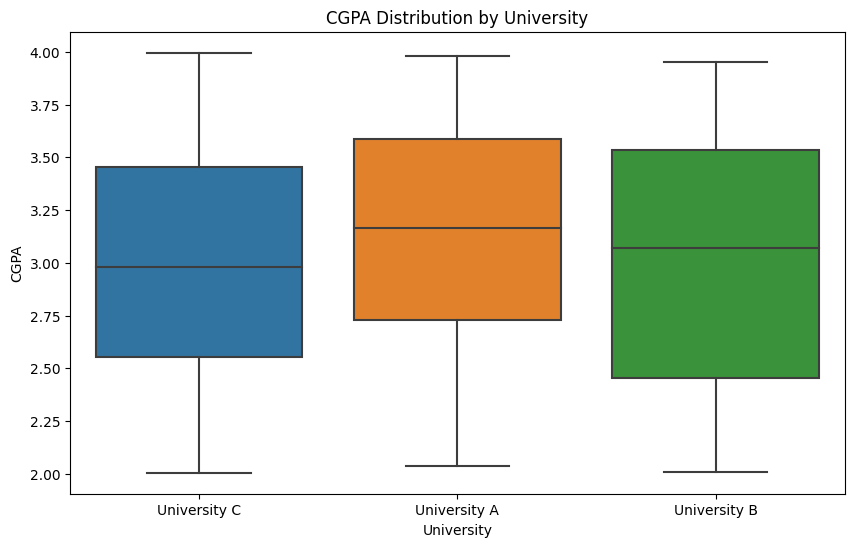

In [73]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a boxplot to visualize the CGPA distribution by university
sns.boxplot(x='university', y='cgpa', data=df)
# Set the title and labels
plt.title('CGPA Distribution by University')
plt.xlabel('University')
plt.ylabel('CGPA')

# Display the plot
plt.show()

### How many male and female students are there in each university?

In [74]:
df.head()

,name,university,cgpa,gender,year,university_type,department,family_income,extracurricular,name_length
0,Emma Brown,University C,2.730714,Female,2022,Private,Chemistry,82188,Yes,10
1,Michael Brown,University A,2.975620,Male,2019,Public,Physics,85099,Yes,13
2,Daniel Smith,University C,3.701635,Male,2020,Private,Physics,65262,Yes,12
3,Michael Brown,University C,2.175775,Male,2018,Private,Chemistry,42677,No,13
4,Michael Lee,University A,3.611730,Female,2020,Public,Physics,81871,Yes,11


In [75]:
df["gender"].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [79]:
male = df.groupby("university")["gender"].value_counts()
male

university    gender
University A  Male      57
              Female    49
University B  Male      54
              Female    47
University C  Male      53
              Female    40
Name: gender, dtype: int64

### Can we cluster students based on their CGPA using k-means clustering?

In [83]:
from sklearn.cluster import KMeans

In [84]:
# Extract the CGPA values as the feature for clustering
X = df[['cgpa']].values

In [85]:
# Specify the number of clusters (k)
k = 3

In [86]:
# Create and fit the k-means clustering model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

C:\Users\Syed Muqtasid Ali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Syed Muqtasid Ali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [87]:
# Assign the cluster labels to each data point
cluster_labels = kmeans.labels_


In [88]:
# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

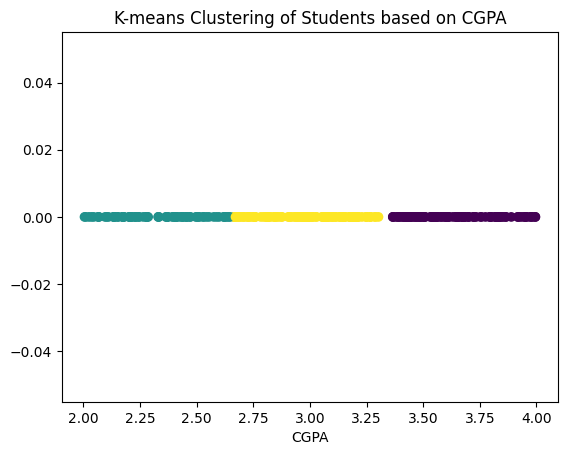

In [89]:
# Visualize the clusters
plt.scatter(X[:, 0], [0] * len(X), c=cluster_labels)
plt.xlabel('CGPA')
plt.title('K-means Clustering of Students based on CGPA')
plt.show()

### What is the average CGPA for each cluster identified in the previous question?

In [91]:
# Calculate the average CGPA for each cluster
average_cgpa_by_cluster = df.groupby('cluster')['cgpa'].mean()
print(average_cgpa_by_cluster)

cluster
1.003333    3.046851
Name: cgpa, dtype: float64


### Can we classify students into universities based on their CGPA using a decision tree?

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [93]:
# Define the features (CGPA) and the target (university)
X = df[['cgpa']]
y = df['university']

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Create and train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
# Predict the university for the test set
y_pred = model.predict(X_test)

In [98]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:" ,accuracy)

Accuracy: 0.3333333333333333


### How accurate is the decision tree model in predicting the university?

In [99]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained and obtained the predictions
# y_pred contains the predicted university labels for the test set
# y_test contains the true university labels for the test set

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.3333333333333333


### Can we identify any differences in CGPA distribution between public and private universities?

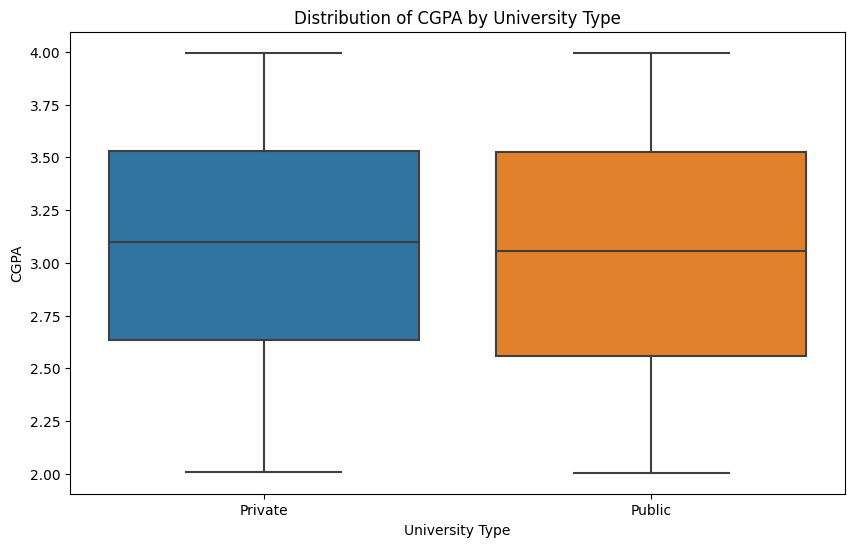

In [106]:
# Create a boxplot to visualize the distribution of CGPA by university type
plt.figure(figsize=(10, 6))
sns.boxplot(x='university_type', y='cgpa', data=df)
plt.xlabel('University Type')
plt.ylabel('CGPA')
plt.title('Distribution of CGPA by University Type')
plt.show()

### What is the overall average CGPA across all universities?

In [109]:
over_all_average= df.groupby("university")["cgpa"].mean()
over_all_average

university
University A    3.120098
University B    3.021482
University C    2.990915
Name: cgpa, dtype: float64

### Can we build a regression model to predict a student's CGPA based on their university?

In [110]:
# Extract the features (university) and target (CGPA)
X = pd.get_dummies(df['university'])  # One-hot encoding or label encoding
y = df['cgpa']

In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [113]:
# Predict CGPA for the test set
y_pred = model.predict(X_test)

In [114]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",mse)

Mean Squared Error:  0.33871820918301637


### How well does the regression model perform in predicting the CGPA?

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [120]:
# Print the evaluation metrics
print("Mean Squared Error (MSE): ",mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE): ",mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE):  0.33871820918301637
Root Mean Squared Error (RMSE): 0.581995025050057
Mean Absolute Error (MAE):  0.4983123271793711
R-squared (R2) Score: -0.03238663512590989


### Are there any missing or erroneous values in the CGPA column?

In [121]:
df["cgpa"].isnull().sum()

0

In [123]:
# Check for erroneous values in the CGPA column (if applicable)
# You can define the range of valid CGPA values based on your dataset
valid_cgpa_range = (0, 4.0)
erroneous_values = df[(df['cgpa'] < valid_cgpa_range[0]) | (df['cgpa'] > valid_cgpa_range[1])]['cgpa'].count()
print("Erroneous values in CGPA column:" ,erroneous_values)

Erroneous values in CGPA column: 0


### What is the range of CGPA scores for each university?

In [148]:
# Calculate the range of CGPA scores for each university
cgpa_range = df.groupby('university')['cgpa'].agg(['min', 'max'])

In [149]:
# Print the range of CGPA scores for each university
print(cgpa_range)

                   min       max
university                      
University A  2.036485  3.981859
University B  2.010600  3.950134
University C  2.005422  3.995385


### Can we identify any clusters or groups of students based on the CGPA and university using hierarchical clustering?

In [152]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [155]:
# One-hot encode the 'university' column
df_encoded = pd.get_dummies(df, columns=['university'])

In [156]:
# Extract the features (CGPA and encoded universities)
X = df_encoded[['cgpa', 'university_University A', 'university_University B', 'university_University C']]


In [157]:
# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

C:\Users\Syed Muqtasid Ali\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


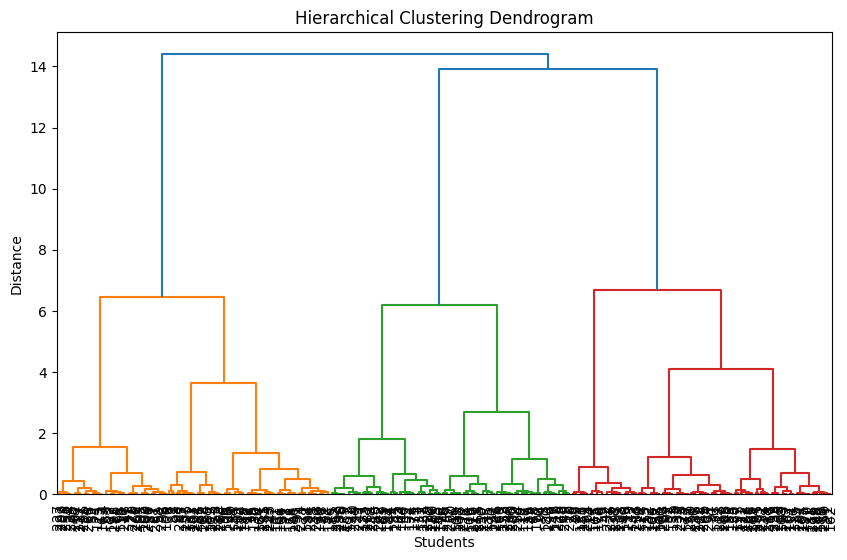

In [161]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df_encoded.index, leaf_font_size=10)
plt.xlabel('Students')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Can we build a classification model to predict the university based on the CGPA and the length of the student's name?

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
# Extract the features (CGPA and name length) and the target (university)
X = df[['cgpa', 'name_length']]
y = df['university']

In [164]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [165]:
# Create and train the classification model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Syed Muqtasid Ali\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


LogisticRegression()

In [166]:
# Predict the university for the test set
y_pred = model.predict(X_test)

C:\Users\Syed Muqtasid Ali\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [167]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3


### What is the correlation between the length of the student's name and the CGPA within each university?

In [168]:
# Calculate the correlation between name length and CGPA within each university
correlations = df.groupby('university')[['name_length', 'cgpa']].corr().iloc[0::2, -1]


In [169]:
# Print the correlation values
print(correlations)

university               
University A  name_length   -0.121827
University B  name_length    0.009734
University C  name_length    0.007274
Name: cgpa, dtype: float64


# End Of Question
These questions should help you explore various aspects of the dataset and uncover insights about the students' CGPA scores, universities, and potential relationships between variables. Remember to choose the questions that align with your project goals and objectives. Good luck with your data analysis!